### Importing the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Loading the datasets

In [4]:
df = pd.read_csv("indian_superstore_sample.csv")
df

,Order ID,Region,State,Category,Sub-Category,Sales,Profit,Quantity,Discount,Customer Name,City,Payment Mode,Profit Ratio
0,1,South,Madhya Pradesh,Electronics,Fiction,42962.33,14302.31,5,0.00,Customer_0,City_0,Debit Card,0.33
1,2,South,Himachal Pradesh,Books,Televisions,47173.72,12378.22,18,0.05,Customer_1,City_1,Cash,0.26
2,3,South,Odisha,Electronics,Kids' Fashion,6488.99,8164.77,4,0.20,Customer_2,City_2,UPI,1.26
3,4,West,Odisha,Beauty & Personal Care,Non-Fiction,48905.99,8458.53,7,0.10,Customer_3,City_3,Credit Card,0.17
4,5,Central,Tamil Nadu,Electronics,Skincare,10169.27,4385.13,3,0.00,Customer_4,City_4,UPI,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,West,Gujarat,Beauty & Personal Care,Women's Fashion,12871.94,8304.86,3,0.00,Customer_995,City_995,Debit Card,0.65
996,997,Central,Meghalaya,Books,Televisions,17812.03,7135.16,11,0.00,Customer_996,City_996,Cash,0.40
997,998,North,Goa,Books,Kids' Fashion,23617.61,3540.93,6,0.20,Customer_997,City_997,Cash,0.15
998,999,East,Bihar,Books,Skincare,30393.03,-847.91,9,0.15,Customer_998,City_998,Debit Card,-0.03


### Project 1: General EDA

#### Step 1: Data Cleaning
##### Handling missing values

In [6]:
df.fillna(df.mean, inplace=True)

##### Removing duplicates

In [19]:
df.drop_duplicates(inplace=True)

##### Handling outliers using IQR

In [30]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
df['Sales'] = df['Sales'][~((df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR)))]

### Step 2: Statistical Analysis

In [33]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
          Order ID         Sales        Profit     Quantity    Discount  \
count  1000.000000   1000.000000   1000.000000  1000.000000  1000.00000   
mean    500.500000  24660.345770   5084.091650    10.195000     0.09570   
std     288.819436  14120.751306   5779.944712     5.524626     0.07111   
min       1.000000    502.430000  -4960.700000     1.000000     0.00000   
25%     250.750000  12522.445000    193.565000     5.000000     0.05000   
50%     500.500000  25022.645000   4832.565000    10.000000     0.10000   
75%     750.250000  36079.132500  10233.145000    15.000000     0.15000   
max    1000.000000  49962.920000  14999.140000    19.000000     0.20000   

       Profit Ratio  
count   1000.000000  
mean       0.510520  
std        1.741756  
min       -8.210000  
25%        0.010000  
50%        0.210000  
75%        0.450000  
max       24.580000  


### Correlation Matrix

In [38]:
print("Correlation Matrix:")
print(df[['Sales', 'Profit']].corr())

Correlation Matrix:
           Sales    Profit
Sales   1.000000  0.011906
Profit  0.011906  1.000000


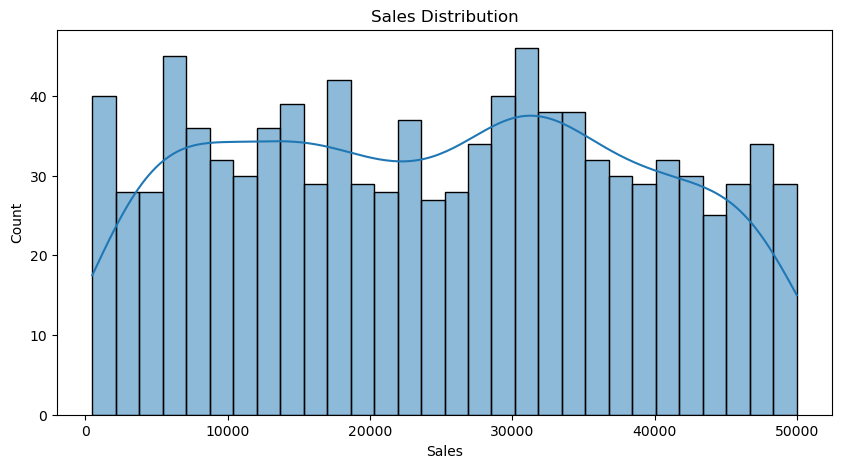

In [40]:
# Step 3: Data Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()

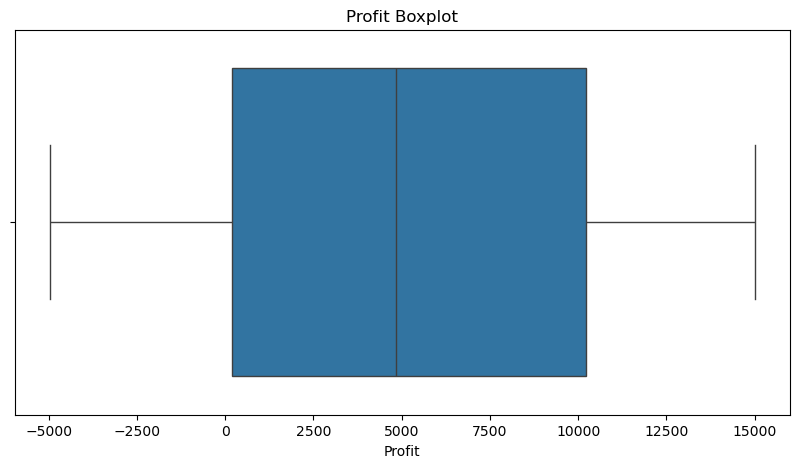

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Profit'])
plt.title('Profit Boxplot')
plt.show()

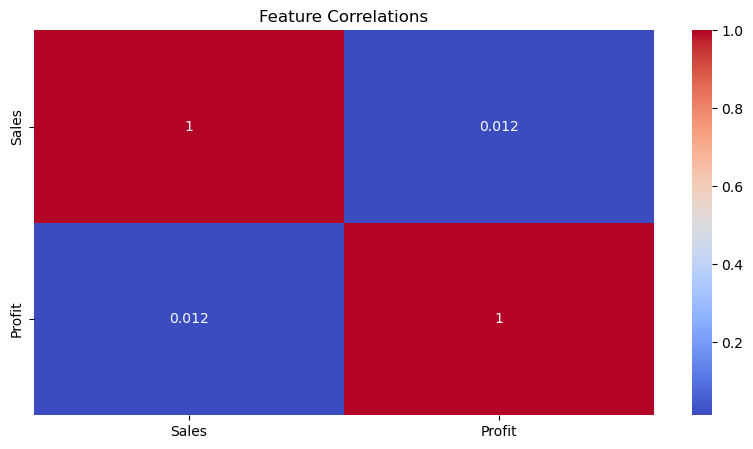

In [48]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[['Sales', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

### Project 2: Sales Performance Analysis
#### Convert Date to datetime format

In [51]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

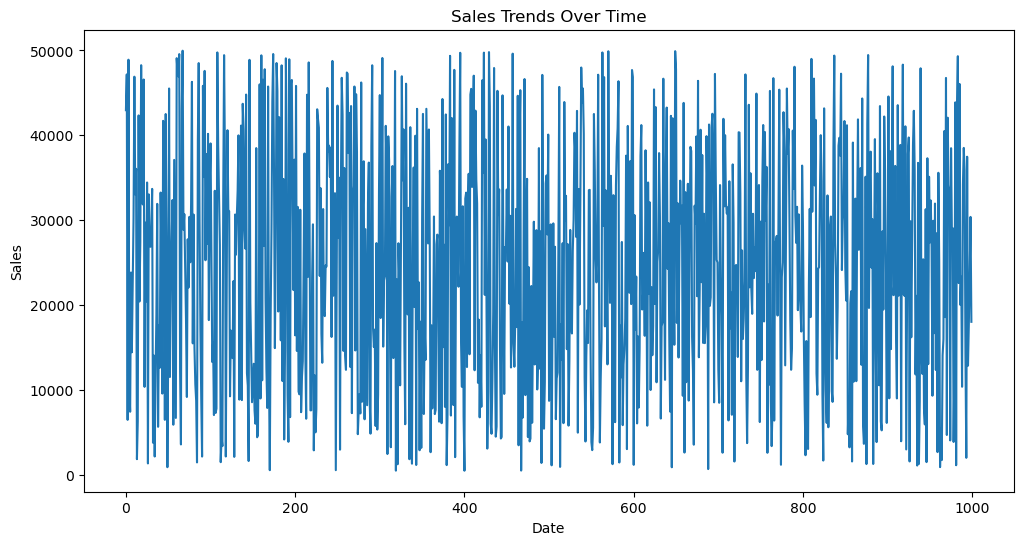

In [53]:
# Time series analysis
plt.figure(figsize=(12, 6))
df['Sales'].plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

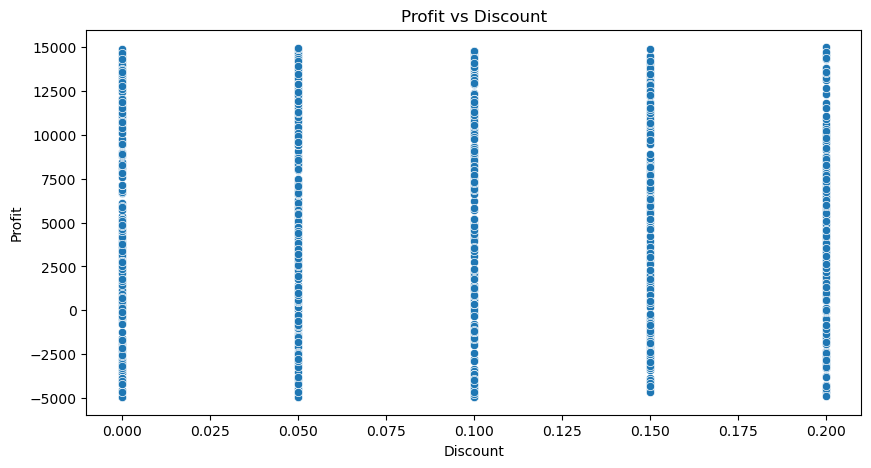

In [55]:
# Profit vs Discount Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Discount'], y=df['Profit'])
plt.title('Profit vs Discount')
plt.show()

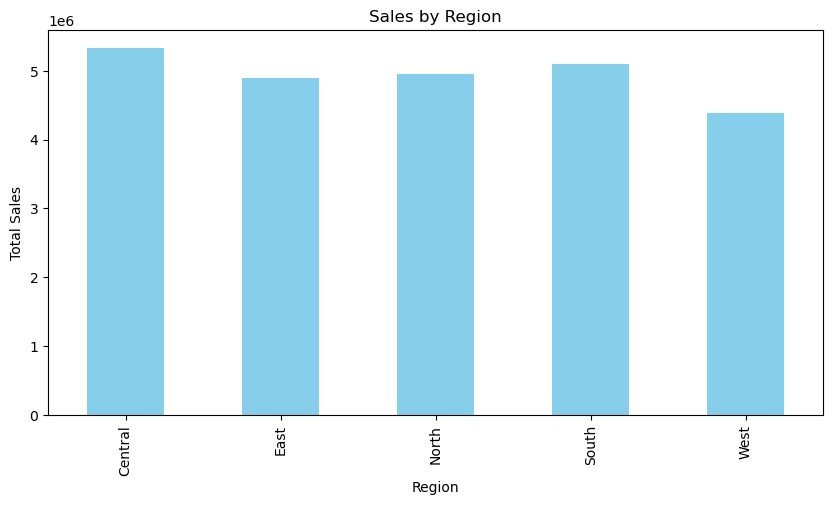

In [57]:
# Sales by Region
if 'Region' in df.columns:
    plt.figure(figsize=(10, 5))
    df.groupby('Region')['Sales'].sum().plot(kind='bar', color='skyblue')
    plt.title('Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Sales')
    plt.show()


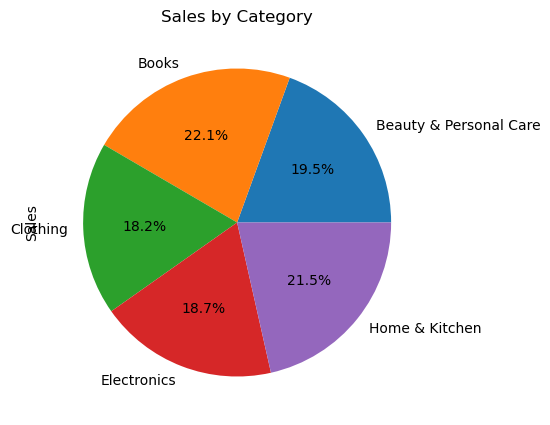

In [59]:
# Sales by Category
if 'Category' in df.columns:
    plt.figure(figsize=(10, 5))
    df.groupby('Category')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Sales by Category')
    plt.show()


In [61]:
# Predictive Modeling - Linear Regression
if {'Sales', 'Profit', 'Discount'}.issubset(df.columns):
    X = df[['Profit', 'Discount']]
    y = df['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Linear Regression Model Performance:")
    print(f"R² Score: {r2_score(y_test, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")


Linear Regression Model Performance:
R² Score: -0.016384245531168018
Mean Squared Error: 216213601.89211112
